# **Image transformations**
* **Basic concepts learnt from: A Deep understanding of Deep Learning (with Python intro) - Mark X Cohen (Udemy) - https://www.udemy.com/course/deeplearning_x**
* **Datasets available using torchvision: https://pytorch.org/vision/0.16/datasets.html**
* **CIFAR**: Canadian Institute For Advanced Research
    * CIFAR10
        * has 10 categories
        * 50000 RGB (3 channel images) each of 32x32 pixels
* **Image transforms available in pytorch: https://pytorch.org/vision/stable/transforms.html**

In [1]:
# import libraries
import numpy as np
import torch as tr

import torchvision as tv
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Import a dataset
# download the CIFAR10 dataset
cdata=tv.datasets.CIFAR10(root='cifar10',download=True)
print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
# check out the shape of the dataset
print(cdata.data.shape) 

# the unique categories
print(cdata.classes)

# .targets is a list of targets converted into integers
print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


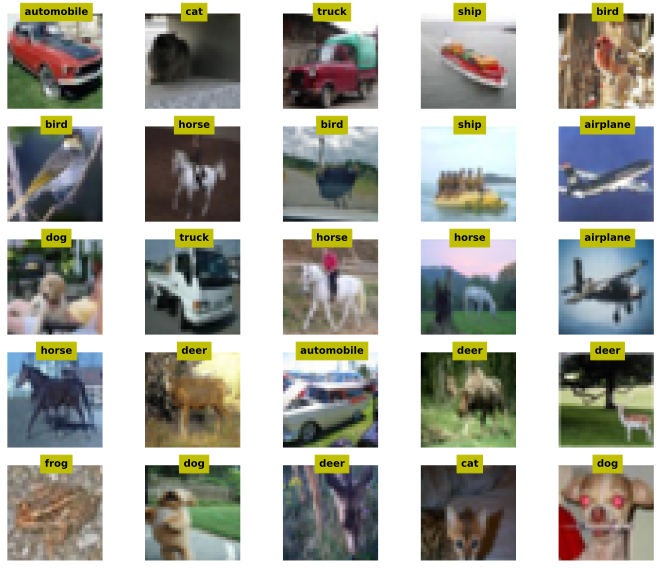

In [4]:
# inspect a few random images
fig,axs=plt.subplots(5,5,figsize=(10,8))
for ax in axs.flatten():
    # select a random picture
    randidx=np.random.choice(len(cdata.targets))

    # extract that image
    pic=cdata.data[randidx,:,:,:]
    # and its label
    label = cdata.classes[cdata.targets[randidx]]

    # and show!
    ax.imshow(pic)
    ax.text(16,0,label,ha='center',fontweight='bold',color='k', backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
### Apply some transformations
Ts=T.Compose([T.ToTensor(),
             T.Resize(32*4),
             T.Grayscale(num_output_channels=1)])

### include the transform in the dataset
cdata.transform=Ts

### you can also apply the transforms immediately when loading in the data
# cdata=tv.datasets.CIFAR10(root="cifar10",download=True,transform=Ts)

### Important! Adding a transform doesn't change the image data
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


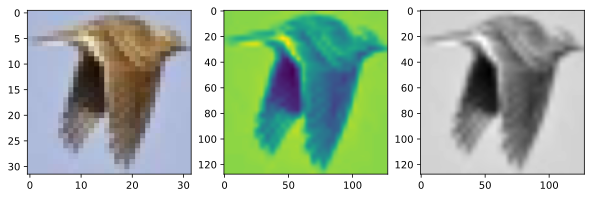

In [6]:
# apply the transformation to the data

# option 1:
img1=Ts(cdata.data[123,:,:,:])

# option2
img2=cdata.transform(cdata.data[123,:,:,:])

# let's see what we have done!
fig,ax=plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(tr.squeeze(img1))
ax[2].imshow(tr.squeeze(img2),cmap="gray")
plt.show()

In [7]:
??T.ToTensor

Init signature: T.ToTensor() -> None
Source:        
class ToTensor:
    """Convert a PIL Image or ndarray to tensor and scale the values accordingly.

    This transform does not support torchscript.

    Converts a PIL Image or numpy.ndarray (H x W x C) in the range
    [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
    if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
    or if the numpy.ndarray has dtype = np.uint8

    In the other cases, tensors are returned without scaling.

    .. note::
        Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
        transforming target image masks. See the `references`_ for implementing the transforms for image masks.

    .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
    """

    def __init__(self) -> None:
        _log_api_usage_once(self)

    def __call__(self, pic):
        """
        Arg

**Additional Explorations:**
<br>
Read about: RandomCrop(), RandomHorizontalFlip(), and CenterCrop()

**1. RandomCrop()**

torch.Size([3, 30, 30])


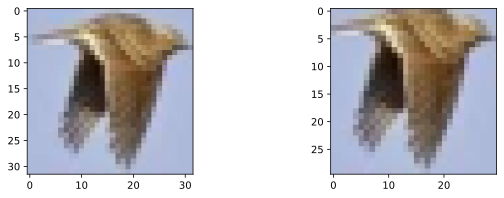

In [32]:
from torchvision.transforms import v2
crop_size=(30,30)
trc=v2.Compose([
        v2.ToImage(),
        v2.RandomCrop(size=crop_size)
        ]
)
# # apply the transformation to the data

imgrc=trc(cdata.data[123,:,:,:])
print(imgrc.shape)

# let's see what we have done!
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(tr.permute(imgrc,(1,2,0)))
plt.show()

**2. Random Horizontal Flip**

torch.Size([3, 32, 32])


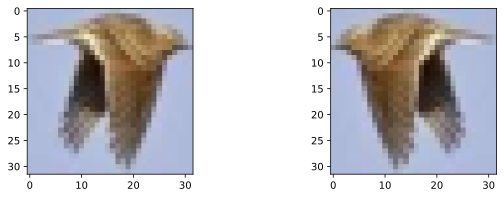

In [33]:
trhf=v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.5)
        ]
)
# # apply the transformation to the data

imgrhf=trhf(cdata.data[123,:,:,:])
print(imgrhf.shape)

# let's see what we have done!
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(tr.permute(imgrhf,(1,2,0)))
plt.show()

**3. CenterCrop**

torch.Size([3, 15, 15])


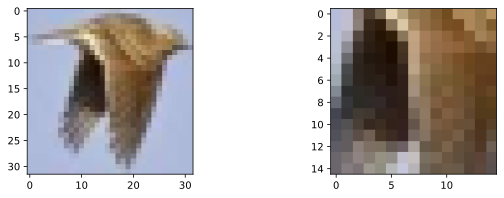

In [39]:
crop_size=(15,15)
tccrop=v2.Compose([
        v2.ToImage(),
        v2.CenterCrop(crop_size)
        ]
)
# # apply the transformation to the data

imgrcc=tccrop(cdata.data[123,:,:,:])
print(imgrcc.shape)

# let's see what we have done!
fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(tr.permute(imgrcc,(1,2,0)))
plt.show()